In [44]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("nikhilmittal/flight-fare-prediction-mh")

print("Path to dataset files:", path)

Path to dataset files: /home/eugen/.cache/kagglehub/datasets/nikhilmittal/flight-fare-prediction-mh/versions/1


In [45]:
df_train = pd.read_excel(path + '/Data_Train.xlsx')
df_test = pd.read_excel(path + '/Test_set.xlsx')
df_train.head(), df_train.describe(), df_train.info(), df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(       Airline Date_of_Journey    Source Destination                  Route  \
 0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
 1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
 2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
 3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
 4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   
 
   Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
 0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
 1    05:50         13:15   7h 25m     2 stops         No info   7662  
 2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
 3    18:05         23:30   5h 25m      1 stop         No info   6218  
 4    16:50         21:35   4h 45m      1 stop         No info  13302  ,
               Price
 count  10683.000000
 mean    9087.064121
 std     4611.359167
 

In [46]:
from datetime import datetime as dt
df_train['Date_of_Journey_day'] = df_train['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').day)
df_train['Date_of_Journey_month'] = df_train['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').month)
df_train['Date_of_Journey_year'] = df_train['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').year)
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [47]:
df_train['Date_of_Journey_year'].value_counts()

Date_of_Journey_year
2019    10683
Name: count, dtype: int64

In [48]:
df_train.drop(['Date_of_Journey', 'Date_of_Journey_year'], axis=1, inplace=True)
df_train.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [49]:
import re

def format_to_minutes(duration):
    matches = re.findall(r'(\d+)\s*([hm])', duration)
    hours = 0
    minutes = 0
    for num, unit in matches:
        if unit == 'h':
            hours = int(num) if num else 0
        elif unit == 'm':
            minutes = int(num) if num else 0
    return hours * 60 + minutes

df_train['Duration_minutes'] = df_train['Duration'].apply(format_to_minutes)
df_train.drop('Duration', axis=1, inplace=True)
df_train.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,1140


In [50]:
def total_stops(stops):
    stops = str(stops) if stops is not None and not pd.isna(stops) else '0'
    matches = re.findall(r'(\d+)', stops)
    return int(matches[0] if len(matches) else 0)

df_train['Total_Stops_count'] = df_train['Total_Stops'].apply(total_stops)
df_train.drop('Total_Stops', axis=1, inplace=True)
df_train.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Duration_minutes,Total_Stops_count
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897,24,3,170,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662,1,5,445,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882,9,6,1140,2


In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#df_train['Airline'] = label_encoder.fit_transform(df_train['Airline'])
df_train['Source'] = label_encoder.fit_transform(df_train['Source'])
#df_train['Destination'] = label_encoder.fit_transform(df_train['Destination'])
df_train.drop(['Airline', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], axis=1, inplace=True)


In [53]:
df_train = pd.get_dummies(df_train, columns=[ 'Source'], drop_first=True)
df_train.head(3)

,Price,Date_of_Journey_day,Date_of_Journey_month,Duration_minutes,Total_Stops_count,Source_1,Source_2,Source_3,Source_4
0,3897,24,3,170,0,False,False,False,False
1,7662,1,5,445,2,False,False,True,False
2,13882,9,6,1140,2,False,True,False,False


In [54]:
from sklearn.ensemble import RandomForestRegressor

rnd_forest_reg = RandomForestRegressor(random_state=0)

X = df_train.drop('Price', axis=1)
y = df_train['Price']

rnd_forest_reg.fit(X, y)
rnd_forest_reg.score(X, y)

0.8670424861920991

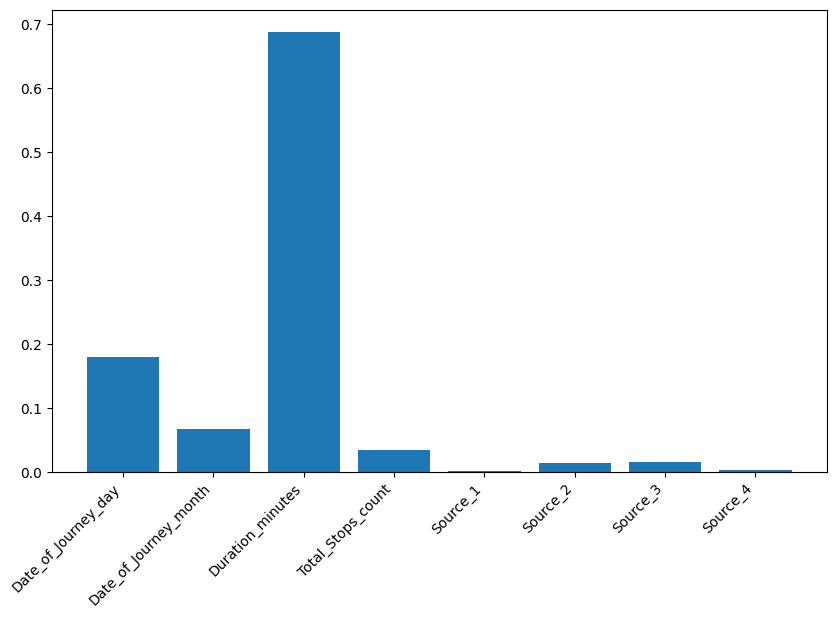

In [55]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, rnd_forest_reg.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = rnd_forest_reg.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = np.mean(np.abs(y - y_pred) / y) * 100
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape)

mae: 1070.0609153323044
mse: 2827028.130850623
rmse: 1681.376855690188
mape: 13.308233745067124


In [57]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [ 300, 400, 500],
    'max_depth': [None, 30, 40, 50],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [2, 4], 
    #'max_features': ['auto', 'sqrt',],
    'bootstrap': [True]
}

best_params = {
    'n_estimators': [500], 
    'min_samples_split': [10], 
    'min_samples_leaf': [2], 
    'max_depth': [40], 
    'bootstrap': [True]
}

rnd_search = RandomizedSearchCV(
    estimator=rnd_forest_reg,
    param_distributions=best_params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=0,
    n_jobs=-1,
    verbose=1
)

rnd_search.fit(X, y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True], 'max_depth': [40],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [10],
                                        'n_estimators': [500]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [58]:
final_model = rnd_search.best_estimator_

y_pred = final_model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = np.mean(np.abs(y - y_pred) / y) * 100

print('score:', final_model.score(X, y))
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape)

score: 0.8033164676366411
mae: 1304.9533885162816
mse: 4182011.7039014837
rmse: 2044.9967491175832
mape: 15.626915237009445


In [60]:
print(rnd_search.best_params_)

df_test = pd.read_excel(path + '/Test_set.xlsx')
df_test['Date_of_Journey_day'] = df_test['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').day)
df_test['Date_of_Journey_month'] = df_test['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').month)
df_test['Date_of_Journey_year'] = df_test['Date_of_Journey'].apply(lambda item: dt.strptime(item, '%d/%m/%Y').year)
df_test['Duration_minutes'] = df_test['Duration'].apply(format_to_minutes)
df_test['Total_Stops_count'] = df_test['Total_Stops'].apply(total_stops)
#df_test['Airline'] = label_encoder.fit_transform(df_test['Airline'])
df_test['Source'] = label_encoder.fit_transform(df_test['Source'])
df_test['Destination'] = label_encoder.fit_transform(df_test['Destination'])
df_test.drop(['Airline', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info', 'Total_Stops', 'Duration', 'Date_of_Journey', 'Date_of_Journey_year'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test, columns=['Source'], drop_first=True)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': True}


In [ ]:
y_pred_test = final_model.predict(df_test)
df_test['result'] = y_pred_test
df_test.head(10)


array([11178.91217753,  4381.21988649, 13574.40719771, ...,
       14796.68427764, 11595.2129199 ,  6843.64298756])